In [1]:
# import the necessary / common libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Load Datasets

In [2]:
# load application dataset

app_data = pd.read_csv("datasets/application_record.csv")

In [3]:
# load credit dataset

credit_data = pd.read_csv("datasets/credit_record.csv")

# Application Records EDA

In [4]:
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
app_data.shape

(438557, 18)

In [6]:
app_data.isnull().sum()

# occupation column has a lot

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [7]:
# check for duplicated records

app_data[app_data.duplicated()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS


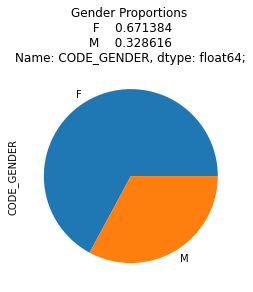

In [8]:
# gender proportions

gender_val = app_data.CODE_GENDER.value_counts(normalize = True)
gender_val.plot.pie()
ax = plt.title('Gender Proportions \n {};'.format(gender_val))
plt.show()

# 67.14% of the applicants are females

In [9]:
# Home Ownerships by Gender

home_ownership_count = app_data.groupby(['CODE_GENDER', 'NAME_HOUSING_TYPE']).agg({'ID': 'count'})
home_ownership_count

ID
CODE_GENDER NAME_HOUSING_TYPE          
F           Co-op apartment         862
            House / apartment    267607
            Municipal apartment   10019
            Office apartment       2122
            Rented apartment       3284
            With parents          10546
M           Co-op apartment         677
            House / apartment    126224
            Municipal apartment    4195
            Office apartment       1800
            Rented apartment       2690
            With parents           8531

In [10]:
# Home Ownership in %

home_ownership_percent = home_ownership_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
home_ownership_percent

ID
CODE_GENDER NAME_HOUSING_TYPE             
F           Co-op apartment       0.292759
            House / apartment    90.886768
            Municipal apartment   3.402731
            Office apartment      0.720690
            Rented apartment      1.115338
            With parents          3.581714
M           Co-op apartment       0.469757
            House / apartment    87.584393
            Municipal apartment   2.910829
            Office apartment      1.248985
            Rented apartment      1.866539
            With parents          5.919496

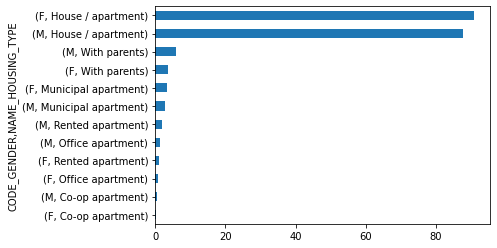

In [11]:
# plot horizontal bar chart for home ownership

home_ownership_percent.sort_values(by = 'ID').plot.barh()
plt.gca().get_legend().remove()
plt.show()

# higher home ownership % for females than males

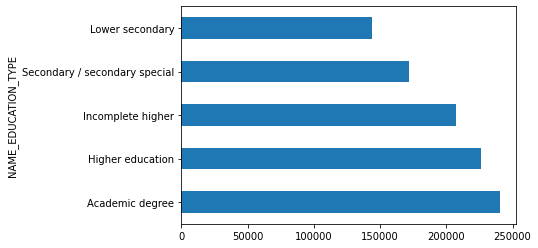

In [12]:
# education level and income relation

app_data.groupby(["NAME_EDUCATION_TYPE"]).AMT_INCOME_TOTAL.mean().sort_values(ascending=False).plot.barh()
plt.show()

# income increases as education level does

# Credit Records EDA

In [13]:
credit_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [14]:
credit_data.shape

(1048575, 3)

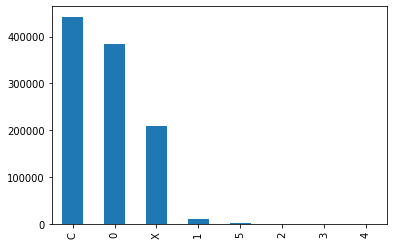

In [15]:
# status distribution

credit_data.STATUS.value_counts().plot.bar()
plt.show()

In [16]:
# find out for how long each customer has had a card

credit_data['MONTHS_BALANCE'] = credit_data.MONTHS_BALANCE.apply(lambda x : x*(-1))
cardholder_tenure = pd.DataFrame(credit_data.groupby('ID').agg({'MONTHS_BALANCE' : max}))
cardholder_tenure.rename(columns = {'MONTHS_BALANCE':'CUST_FOR_MONTHS'}, inplace = True)
cardholder_tenure.head()

,CUST_FOR_MONTHS
ID,
5001711,3
5001712,18
5001713,21
5001714,14
5001715,59


# Merging Modified Credit & Application Records

In [17]:
# merge application and credit records to get the number of months for which customer has had a card

cust_data = pd.merge(app_data, cardholder_tenure, on = 'ID', how = 'inner')
cust_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26


In [18]:
cust_data.shape

(36457, 19)

In [19]:
# change status of "C" and "X" to -1 as they have either paid off or have no loan for that month

credit_data['STATUS'][credit_data["STATUS"] == 'C'] = -1
credit_data['STATUS'][credit_data["STATUS"] == 'X'] = -1
credit_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-1
1,5001711,1,0
2,5001711,2,0
3,5001711,3,0
4,5001712,0,-1


In [20]:
credit_data['STATUS'] = credit_data.STATUS.apply(lambda x : int(x))

In [21]:
# drop duplicates

credit_data.sort_values(by = 'STATUS', ascending = False, inplace = True)
credit_data.drop_duplicates(subset = ['ID'], inplace = True)
credit_data.shape

(45985, 3)

In [22]:
# assuming that after 60 days of payment withstanding, customers are defaulters
# hence, status >= 2 will be considered as so

credit_data['target'] = credit_data.STATUS.apply(lambda x : 1 if x>=2 else 0)
credit_data.drop(['STATUS', 'MONTHS_BALANCE'], axis = 1, inplace = True)
credit_data.head()

,ID,target
372050,5042064,1
307952,5029028,1
723708,5097065,1
942335,5135344,1
832456,5117313,1


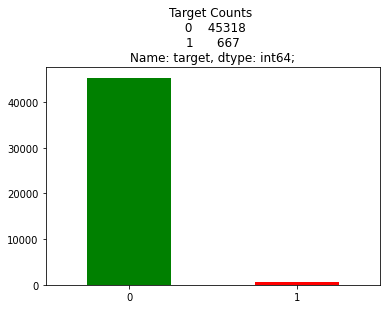

In [23]:
default_val = credit_data.target.value_counts()
default_val.plot.bar(color = ["green", "red"])
ax = plt.title('Target Counts \n {};'.format(default_val))
plt.xticks(rotation = 0)
plt.show()

In [24]:
merged = pd.merge(cust_data, credit_data, on = "ID", how = "inner")
merged.shape

(36457, 20)

In [25]:
merged.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,0


In [26]:
# drop duplicated values

merged.drop_duplicates(subset = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'CUST_FOR_MONTHS',
       'target'], inplace = True)
merged.shape

(32177, 20)

## Merged Records EDA

**Credit records on Income Type**

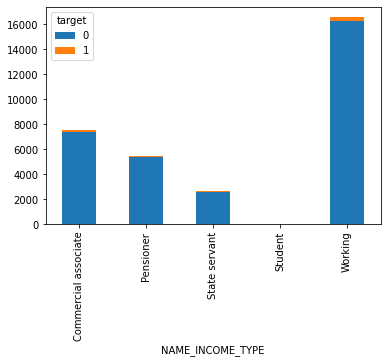

In [27]:
cr_income = merged.groupby(["NAME_INCOME_TYPE"]).target.value_counts().unstack()
cr_income.plot(kind = 'bar', stacked=True)
plt.show()

**Defaulters by Occupational Type**

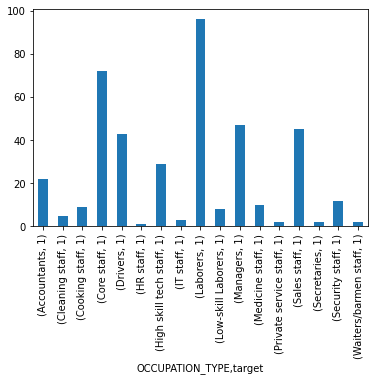

In [28]:
d_occupational_type = merged[merged.target == 1].groupby("OCCUPATION_TYPE").target.value_counts()
d_occupational_type.plot(kind = 'bar')
plt.show()

**Defaulters by AMT_INCOME_TOTAL Type**

In [29]:
print(merged["AMT_INCOME_TOTAL"].min())
print(merged["AMT_INCOME_TOTAL"].max())

27000.0
1575000.0


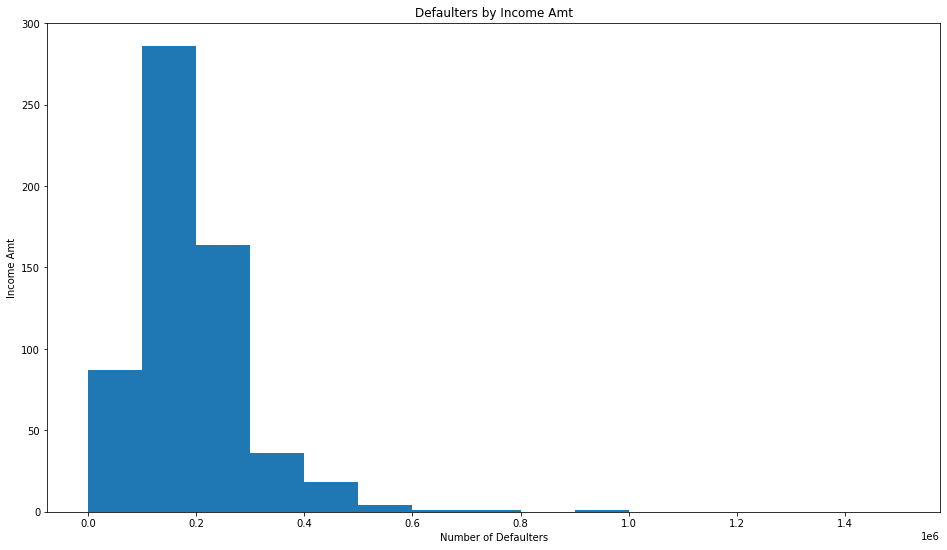

In [30]:
plt.figure(figsize=(16,9))
#normal
plt.hist(merged[merged.target == 1]["AMT_INCOME_TOTAL"], stacked=True, bins =range(0,1600000,100000))
#To see the smaller values, Log=True
# plt.hist(modified[modified.target == 1]["AMT_INCOME_TOTAL"], stacked=True, bins =range(0,1600000,100000),log=True)
#stacked histo
# plt.hist([modified[modified.target == 1]["AMT_INCOME_TOTAL"],modified[modified.target == 0]["AMT_INCOME_TOTAL"]],  stacked=True,bins =range(0,1600000,100000))

plt.title("Defaulters by Income Amt")
plt.xlabel("Number of Defaulters")
plt.ylabel("Income Amt")
plt.show()

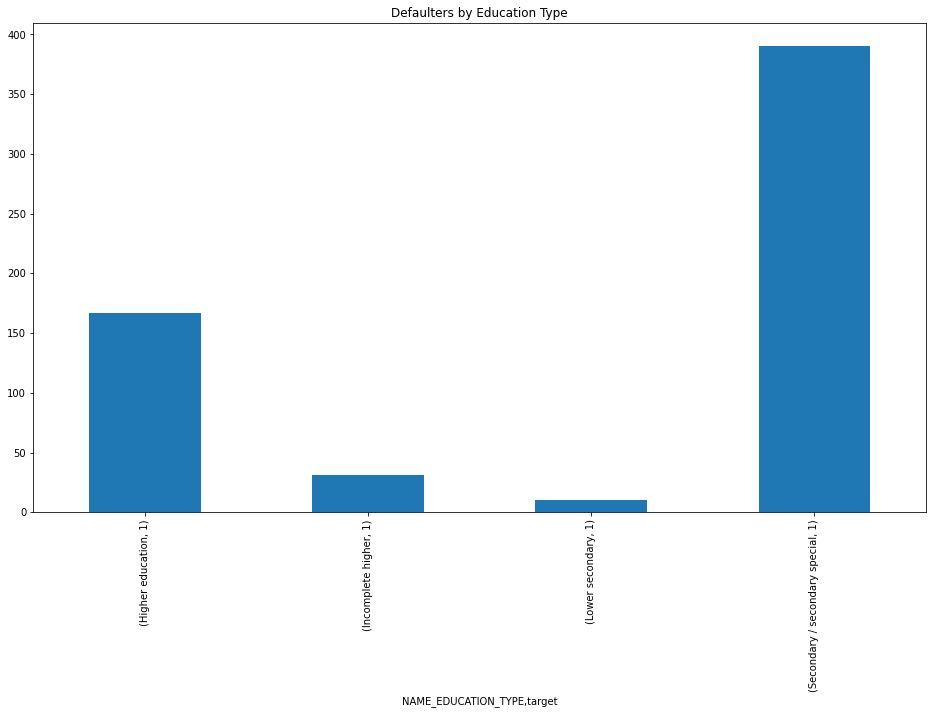

In [31]:
d_education_type = merged[merged.target == 1].groupby("NAME_EDUCATION_TYPE").target.value_counts()
d_education_type.plot(kind='bar', figsize=(16,9),title="Defaulters by Education Type")
plt.show()

## Further Preprocessing for Merged Records

In [32]:
# drop ID since it provides no value

merged.drop("ID", axis = 1, inplace = True)

In [33]:
merged.isnull().sum()

CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE        9980
CNT_FAM_MEMBERS           0
CUST_FOR_MONTHS           0
target                    0
dtype: int64

In [34]:
# there are many null values for OCCUPATION_TYPE, hence we will assume that if null, the person is unemployed

merged['OCCUPATION_TYPE'] = merged.OCCUPATION_TYPE.apply(lambda x : 'UNEMPLOYED' if pd.isnull(x) else x)

In [35]:
# check to see if anymore null records

merged.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
CUST_FOR_MONTHS        0
target                 0
dtype: int64

In [36]:
# convert binary categorical columns

merged['CODE_GENDER'] = merged.CODE_GENDER.apply(lambda x : 0 if x == 'M' else 1)
merged['FLAG_OWN_CAR'] = merged.FLAG_OWN_CAR.apply(lambda x : 0 if x == 'N' else 1)
merged['FLAG_OWN_REALTY'] = merged.FLAG_OWN_REALTY.apply(lambda x : 0 if x == 'N' else 1)
merged.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,UNEMPLOYED,2.0,15,0
1,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,UNEMPLOYED,2.0,14,0
2,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,0
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,0
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,0


In [37]:
merged.FLAG_MOBIL.value_counts()

1    32177
Name: FLAG_MOBIL, dtype: int64

In [38]:
# since all rows have FLAG_MOBIL as 1, there isn't much value add and it will be dropped

merged.drop("FLAG_MOBIL", axis = 1, inplace = True)

In [39]:
# convert CNT_FAM_MEMBERS to integer

merged['CNT_FAM_MEMBERS'] = merged['CNT_FAM_MEMBERS'].astype('int')
merged.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,UNEMPLOYED,2,15,0
1,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,UNEMPLOYED,2,14,0
2,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2,29,0
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,4,0
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,26,0


In [40]:
# since both DAYS_BIRTH and DAYS_EMPLOYED are backwards counted, we need to make them positive

merged["DAYS_BIRTH"] = merged["DAYS_BIRTH"].apply(lambda x : x*-1)
merged["DAYS_EMPLOYED"] = merged["DAYS_EMPLOYED"].apply(lambda x : x*-1)
merged.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target
0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,0,0,UNEMPLOYED,2,15,0
1,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,0,0,UNEMPLOYED,2,14,0
2,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,0,0,0,Security staff,2,29,0
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,0,1,1,Sales staff,1,4,0
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,0,1,1,Sales staff,1,26,0


In [41]:
# convert days to years

merged["EMP_YEARS"] = merged.DAYS_EMPLOYED / 365
merged["AGE"] = merged.DAYS_BIRTH / 365
merged.drop(["DAYS_BIRTH","DAYS_EMPLOYED"], axis = 1, inplace = True)
merged.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE
0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,UNEMPLOYED,2,15,0,12.443836,32.890411
1,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,UNEMPLOYED,2,14,0,12.443836,32.890411
2,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,29,0,3.106849,58.832877
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,4,0,8.358904,52.356164
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,26,0,8.358904,52.356164


In [42]:
# assume that if EMP_YEARS < 0, they are pensioners, hence change EMP_YEARS to -1 for them

merged['EMP_YEARS'] = merged.EMP_YEARS.apply(lambda x : -1 if x<0 else x)

# Classification Models

In [43]:
# from sklearn.metrics import classification_report

In [44]:
# create deep copy of merged so that it doesn't affect the original merged copy

merged_for_predictions = merged.copy()
merged_for_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32595 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          32595 non-null  int64  
 1   FLAG_OWN_CAR         32595 non-null  int64  
 2   FLAG_OWN_REALTY      32595 non-null  int64  
 3   CNT_CHILDREN         32595 non-null  int64  
 4   AMT_INCOME_TOTAL     32595 non-null  float64
 5   NAME_INCOME_TYPE     32595 non-null  object 
 6   NAME_EDUCATION_TYPE  32595 non-null  object 
 7   NAME_FAMILY_STATUS   32595 non-null  object 
 8   NAME_HOUSING_TYPE    32595 non-null  object 
 9   FLAG_WORK_PHONE      32595 non-null  int64  
 10  FLAG_PHONE           32595 non-null  int64  
 11  FLAG_EMAIL           32595 non-null  int64  
 12  OCCUPATION_TYPE      32595 non-null  object 
 13  CNT_FAM_MEMBERS      32595 non-null  int32  
 14  CUST_FOR_MONTHS      32595 non-null  int64  
 15  target               32595 non-null 

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# label tracker for reference
labels_dict = {}
for feature in merged_for_predictions:
    if merged_for_predictions[feature].dtypes == "object":
        new_encoded_column = f"{feature}_ENCODED"
        merged_for_predictions[new_encoded_column] = le.fit_transform(merged_for_predictions[feature])
        temp_df = merged_for_predictions.drop_duplicates(feature).set_index(feature)
        temp_dict = temp_df.to_dict()
        labels_dict[feature] = temp_dict[new_encoded_column]
        merged_for_predictions.drop([feature], axis = 1, inplace = True)
        
merged_for_predictions.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,NAME_INCOME_TYPE_ENCODED,NAME_EDUCATION_TYPE_ENCODED,NAME_FAMILY_STATUS_ENCODED,NAME_HOUSING_TYPE_ENCODED,OCCUPATION_TYPE_ENCODED
0,0,1,1,0,427500.0,1,0,0,2,15,1,12.443836,32.890411,4,1,0,4,17
1,0,1,1,0,427500.0,1,0,0,2,14,1,12.443836,32.890411,4,1,0,4,17
2,0,1,1,0,112500.0,0,0,0,2,29,0,3.106849,58.832877,4,4,1,1,16
3,1,0,1,0,270000.0,0,1,1,1,4,0,8.358904,52.356164,0,4,3,1,14
4,1,0,1,0,270000.0,0,1,1,1,26,0,8.358904,52.356164,0,4,3,1,14


In [46]:
labels_dict

{'NAME_INCOME_TYPE': {'Working': 4,
  'Commercial associate': 0,
  'Pensioner': 1,
  'State servant': 2,
  'Student': 3},
 'NAME_EDUCATION_TYPE': {'Higher education': 1,
  'Secondary / secondary special': 4,
  'Incomplete higher': 2,
  'Lower secondary': 3,
  'Academic degree': 0},
 'NAME_FAMILY_STATUS': {'Civil marriage': 0,
  'Married': 1,
  'Single / not married': 3,
  'Separated': 2,
  'Widow': 4},
 'NAME_HOUSING_TYPE': {'Rented apartment': 4,
  'House / apartment': 1,
  'Municipal apartment': 2,
  'With parents': 5,
  'Co-op apartment': 0,
  'Office apartment': 3},
 'OCCUPATION_TYPE': {'UNEMPLOYED': 17,
  'Security staff': 16,
  'Sales staff': 14,
  'Accountants': 0,
  'Laborers': 8,
  'Managers': 10,
  'Drivers': 4,
  'Core staff': 3,
  'High skill tech staff': 6,
  'Cleaning staff': 1,
  'Private service staff': 12,
  'Cooking staff': 2,
  'Low-skill Laborers': 9,
  'Medicine staff': 11,
  'Secretaries': 15,
  'Waiters/barmen staff': 18,
  'HR staff': 5,
  'Realty agents': 13,
 

**Train Test Split**

In [47]:
X = merged_for_predictions.drop(["target"], axis=1)
y = merged_for_predictions["target"]

In [48]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Scaling**

In [49]:
# since features are of different ranges, we will scale

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns = X_test.columns)

**SMOTE**

In [50]:
# !pip install --user imblearn

In [51]:
# to address imbalances in the dataset

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

### XGBoost

In [52]:
from xgboost import XGBClassifier

In [53]:
xgb = XGBClassifier(use_label_encoder = False, eval_metric = "logloss")
xgb.fit(X_balanced, y_balanced)
train_score = xgb.score(X_balanced, y_balanced)
test_score = xgb.score(X_test_balanced, y_test_balanced)
xgb_pred = xgb.predict(X_test_balanced)
print(train_score)
print(test_score)

0.9386558412268832
0.9155472491531363


In [54]:
print(classification_report(y_test_balanced, xgb_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8561
           1       0.98      0.85      0.91      8561

    accuracy                           0.92     17122
   macro avg       0.92      0.92      0.92     17122
weighted avg       0.92      0.92      0.92     17122



### Random Forest

In [60]:
print('Training Features Shape:', X_balanced.shape)
print('Training Labels Shape:', y_balanced.shape)
print('Testing Features Shape:', X_test_balanced.shape)
print('Testing Labels Shape:', y_test_balanced.shape)

Training Features Shape: (39906, 17)
Training Labels Shape: (39906,)
Testing Features Shape: (17122, 17)
Testing Labels Shape: (17122,)


In [74]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Instantiate model with 1000 decision trees, base on the gridsearch best hyperpermeter
rf = RandomForestClassifier(n_estimators= 1000, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

# Train the model on training data
rf.fit(X_balanced, y_balanced);

In [79]:
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test_balanced)

# Calculate the absolute errors
errors = abs(predictions - y_test_balanced)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test_balanced)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)


train_adjusted_r2 = 1 - (1-rf.score(X_balanced, y_balanced)) * (len(y)-1)/(len(y)-X.shape[1]-1)
test_adjusted_r2 = 1 - (1-rf.score(X_test_balanced, y_test_balanced)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test_balanced, predictions)}")
print(f"MSE: {mean_squared_error(y_test_balanced, predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_balanced, predictions))}")
print(f"R-squared score for train: {rf.score(X_balanced, y_balanced)}")
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"R-squared score for test: {rf.score(X_test_balanced, y_test_balanced)}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf, X, y, cv=strat_k_fold)), 4)}")                
# print('Accuracy:', round(accuracy, 2), '%.')


Evaluation Metrics for Random Forest Regression
MAE: 0.17702371218315618
MSE: 0.17702371218315618
RMSE: 0.42074185931893704
R-squared score for train: 0.9578760086202576
Adjusted R-squared score for train: 0.9578540266129071
R-squared score for test: 0.8229762878168438
Adjusted R-squared score for test: 0.8228839096633271
Cross Validation Score: 0.8771


In [80]:
print(classification_report(y_test_balanced, rf_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84      8561
           1       0.94      0.69      0.80      8561

    accuracy                           0.82     17122
   macro avg       0.85      0.82      0.82     17122
weighted avg       0.85      0.82      0.82     17122



In [81]:
#with stratifiedkfold = 3 #using cvfold = 3 parameters
rf = RandomForestClassifier(n_estimators= 300, max_depth= 90, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

rf.fit(X_balanced, y_balanced)
rf_pred = rf.predict(X_test_balanced)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test_balanced, rf_pred)}")
print(f"MSE: {mean_squared_error(y_test_balanced, rf_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_balanced, rf_pred))}")
print(f"R-squared score for train: {rf.score(X_balanced, y_balanced)}")
print(f"R-squared score for test: {rf.score(X_test_balanced, y_test_balanced)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf, X_balanced, y_balanced, cv=strat_k_fold)), 4)}")

Evaluation Metrics for Random Forest Regression
MAE: 0.17252657399836469
MSE: 0.17252657399836469
RMSE: 0.4153631832485454
R-squared score for train: 0.9583270686112364
R-squared score for test: 0.8274734260016353
Cross Validation Score: 0.9109


In [82]:
print(classification_report(y_test_balanced, rf_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85      8561
           1       0.93      0.70      0.80      8561

    accuracy                           0.83     17122
   macro avg       0.85      0.83      0.82     17122
weighted avg       0.85      0.83      0.82     17122



### Neural Network

In [89]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
NN_model = Sequential()
# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = 17, activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=NN_model.fit(X_balanced, y_balanced, epochs=20, batch_size=5, validation_split=0.2)


Epoch 1/20
6385/6385 [==============================] - 24s 4ms/step - loss: 5.7840 - accuracy: 0.6250 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 2/20
6385/6385 [==============================] - 20s 3ms/step - loss: 5.7840 - accuracy: 0.6250 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 3/20
6385/6385 [==============================] - 22s 3ms/step - loss: 5.7840 - accuracy: 0.6250 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 4/20
6385/6385 [==============================] - 22s 3ms/step - loss: 5.7840 - accuracy: 0.6250 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 5/20
6385/6385 [==============================] - 22s 3ms/step - loss: 5.7840 - accuracy: 0.6250 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 6/20
6385/6385 [==============================] - 22s 3ms/step - loss: 5.7840 - accuracy: 0.6250 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 7/20
6385/6385 [==============================] - 23s 4ms/step - loss: 5.7840 - accuracy: 0.62

In [96]:
predictions = NN_model.predict(X_test_balanced)
predictions_classes = np.argmax(predictions, axis=-1)


In [98]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_balanced, predictions_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_balanced, predictions_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_balanced, predictions_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_balanced, predictions_classes)
print('F1 score: %f' % f1)

Accuracy: 0.500000
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


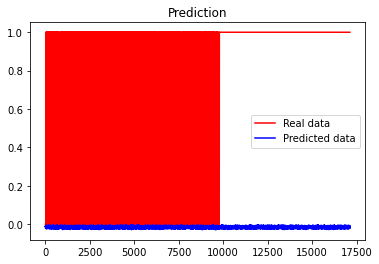

In [100]:
plt.plot(y_test_balanced,  color = 'red', label = 'Real data')
plt.plot(predictions,  color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [85]:
# !pip install keras

In [87]:
# !pip install tensorflow

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=b410feee1b2266cd3481e817397fef61a2419d5dde13a2ab56e7c924c4dbdc8c
  Stored in directory: c:\users\wei-d\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


# Calculation of WOE and IV (to be refined later)

In [43]:
def calc_woe_iv(col) :
    df = pd.DataFrame(columns = ['values','total','good','bad','event_rate','non_event_rate','per_total_events','per_total_non_events','WOE','IV'])
    df['values'] = merged[col].unique()
    df.set_index('values', inplace = True)
    
    values = merged[col].unique()
    total_dict = dict(merged.groupby(col).size())
    col_target_dict = dict(merged.groupby([col,'target']).size())
    target_count = dict(merged.groupby(['target']).size())
    
    for value in values :
        df.loc[value]['total'] = total_dict[value]
        if (value,0) in col_target_dict:
            df.loc[value]['good'] = col_target_dict[(value,0)]
        else:
            df.loc[value]['good'] = 0
        
        if (value,1) in col_target_dict:
            df.loc[value]['bad'] = col_target_dict[(value,1)]
        else :
            df.loc[value]['bad'] = 0
            
        if df.loc[value]['bad'] == 0:
            df = df.drop([value])
        
    df['event_rate'] = df['bad']/df['total']
    df['non_event_rate'] = df['good']/df['total']
    
    df['per_total_events'] = df['bad']/target_count[1]
    df['per_total_non_events'] = df['good']/target_count[0]
    
    df['WOE'] = np.log(df.per_total_non_events.astype('float64')/df.per_total_events.astype('float64'))
    df['IV'] = (df['per_total_non_events'] - df['per_total_events']) * df['WOE']
    
    return df

In [44]:
iv_values = pd.DataFrame(columns = ['col_name','iv_value'])
iv_values['col_name'] = merged.columns
iv_values.set_index(['col_name'], inplace = True)
iv_values.drop(['target'], inplace = True)
iv_values

,iv_value
col_name,
CODE_GENDER,NaN
FLAG_OWN_CAR,NaN
FLAG_OWN_REALTY,NaN
CNT_CHILDREN,NaN
AMT_INCOME_TOTAL,NaN
NAME_INCOME_TYPE,NaN
NAME_EDUCATION_TYPE,NaN
NAME_FAMILY_STATUS,NaN
NAME_HOUSING_TYPE,NaN


## Binary Variables

In [45]:
CODE_GENDER_df = calc_woe_iv('CODE_GENDER')
iv_values.loc['CODE_GENDER'] = CODE_GENDER_df.IV.sum()
print(iv_values.loc['CODE_GENDER'])
CODE_GENDER_df

iv_value    0.011588
Name: CODE_GENDER, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,10642,10414,228,0.021425,0.978575,0.381271,0.329776,-0.145096,0.007472
1,21535,21165,370,0.017181,0.982819,0.618729,0.670224,0.079944,0.004117


In [46]:
FLAG_OWN_CAR_df = calc_woe_iv('FLAG_OWN_CAR')
iv_values.loc['FLAG_OWN_CAR'] = FLAG_OWN_CAR_df.IV.sum()
print(iv_values.loc['FLAG_OWN_CAR'])
FLAG_OWN_CAR_df

iv_value    0.002292
Name: FLAG_OWN_CAR, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,12190,11977,213,0.017473,0.982527,0.356187,0.379271,0.062794,0.00145
0,19987,19602,385,0.019263,0.980737,0.643813,0.620729,-0.036513,0.000843


In [47]:
FLAG_OWN_REALTY_df = calc_woe_iv('FLAG_OWN_REALTY')
iv_values.loc['FLAG_OWN_REALTY'] = FLAG_OWN_REALTY_df.IV.sum()
print(iv_values.loc['FLAG_OWN_REALTY'])
FLAG_OWN_REALTY_df

iv_value    0.030487
Name: FLAG_OWN_REALTY, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,21597,21245,352,0.016299,0.983701,0.588629,0.672757,0.133589,0.011239
0,10580,10334,246,0.023251,0.976749,0.411371,0.327243,-0.228794,0.019248


In [48]:
FLAG_WORK_PHONE_df = calc_woe_iv('FLAG_WORK_PHONE')
iv_values.loc['FLAG_WORK_PHONE'] = FLAG_WORK_PHONE_df.IV.sum()
print(iv_values.loc['FLAG_WORK_PHONE'])
FLAG_WORK_PHONE_df

iv_value    0.002058
Name: FLAG_WORK_PHONE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,7249,7103,146,0.020141,0.979859,0.244147,0.224928,-0.081991,0.001576
0,24928,24476,452,0.018132,0.981868,0.755853,0.775072,0.025109,0.000483


In [49]:
FLAG_PHONE_df = calc_woe_iv('FLAG_PHONE')
iv_values.loc['FLAG_PHONE'] = FLAG_PHONE_df.IV.sum()
print(iv_values.loc['FLAG_PHONE'])
FLAG_PHONE_df

iv_value    0.000168
Name: FLAG_PHONE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,22679,22261,418,0.018431,0.981569,0.698997,0.70493,0.008453,0.00005
1,9498,9318,180,0.018951,0.981049,0.301003,0.29507,-0.019910,0.000118


In [50]:
FLAG_EMAIL_df = calc_woe_iv('FLAG_EMAIL')
iv_values.loc['FLAG_EMAIL'] = FLAG_EMAIL_df.IV.sum()
print(iv_values.loc['FLAG_EMAIL'])
FLAG_EMAIL_df

iv_value    0.00053
Name: FLAG_EMAIL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,29282,28734,548,0.018715,0.981285,0.916388,0.909908,-0.007096,0.000046
1,2895,2845,50,0.017271,0.982729,0.083612,0.090092,0.074638,0.000484


## Categorical Variables

In [51]:
NAME_INCOME_TYPE_df = calc_woe_iv('NAME_INCOME_TYPE')
iv_values.loc['NAME_INCOME_TYPE'] = NAME_INCOME_TYPE_df.IV.sum()
print(iv_values.loc['NAME_INCOME_TYPE'])
NAME_INCOME_TYPE_df

iv_value    0.017319
Name: NAME_INCOME_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Working,16564,16270,294,0.017749,0.982251,0.491639,0.515216,0.046842,0.001104
Commercial associate,7492,7353,139,0.018553,0.981447,0.232441,0.232845,0.001733,0.000001
Pensioner,5478,5350,128,0.023366,0.976634,0.214047,0.169416,-0.233835,0.010436
State servant,2633,2596,37,0.014052,0.985948,0.061873,0.082207,0.284152,0.005778


In [52]:
NAME_EDUCATION_TYPE_df = calc_woe_iv('NAME_EDUCATION_TYPE')
iv_values.loc['NAME_EDUCATION_TYPE'] = NAME_EDUCATION_TYPE_df.IV.sum()
print(iv_values.loc['NAME_EDUCATION_TYPE'])
NAME_EDUCATION_TYPE_df

iv_value    0.008581
Name: NAME_EDUCATION_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Higher education,8670,8503,167,0.019262,0.980738,0.279264,0.269261,-0.036476,0.000365
Secondary / secondary special,21895,21505,390,0.017812,0.982188,0.652174,0.680991,0.043237,0.001246
Incomplete higher,1251,1220,31,0.02478,0.97522,0.051839,0.038633,-0.294038,0.003883
Lower secondary,336,326,10,0.029762,0.970238,0.016722,0.010323,-0.482345,0.003087


In [53]:
NAME_FAMILY_STATUS_df = calc_woe_iv('NAME_FAMILY_STATUS')
iv_values.loc['NAME_FAMILY_STATUS'] = NAME_FAMILY_STATUS_df.IV.sum()
print(iv_values.loc['NAME_FAMILY_STATUS'])
NAME_FAMILY_STATUS_df

iv_value    0.031572
Name: NAME_FAMILY_STATUS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Civil marriage,2620,2575,45,0.017176,0.982824,0.075251,0.081542,0.080285,0.000505
Married,22085,21705,380,0.017206,0.982794,0.635452,0.687324,0.078470,0.00407
Single / not married,4254,4155,99,0.023272,0.976728,0.165552,0.131575,-0.229709,0.007805
Separated,1857,1827,30,0.016155,0.983845,0.050167,0.057855,0.142576,0.001096
Widow,1361,1317,44,0.032329,0.967671,0.073579,0.041705,-0.567735,0.018096


In [54]:
NAME_HOUSING_TYPE_df = calc_woe_iv('NAME_HOUSING_TYPE')
iv_values.loc['NAME_HOUSING_TYPE'] = NAME_HOUSING_TYPE_df.IV.sum()
print(iv_values.loc['NAME_HOUSING_TYPE'])
NAME_HOUSING_TYPE_df

iv_value    0.016678
Name: NAME_HOUSING_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Rented apartment,492,484,8,0.01626,0.98374,0.013378,0.015327,0.135986,0.000265
House / apartment,28723,28201,522,0.018174,0.981826,0.87291,0.89303,0.022788,0.000459
Municipal apartment,1015,985,30,0.029557,0.970443,0.050167,0.031192,-0.475213,0.009017
With parents,1579,1553,26,0.016466,0.983534,0.043478,0.049178,0.123190,0.000702
Co-op apartment,137,134,3,0.021898,0.978102,0.005017,0.004243,-0.167429,0.000129
Office apartment,231,222,9,0.038961,0.961039,0.01505,0.00703,-0.761204,0.006105


In [55]:
OCCUPATION_TYPE_df = calc_woe_iv('OCCUPATION_TYPE')
iv_values.loc['OCCUPATION_TYPE'] = OCCUPATION_TYPE_df.IV.sum()
print(iv_values.loc['OCCUPATION_TYPE'])
OCCUPATION_TYPE_df

iv_value    0.053347
Name: OCCUPATION_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
UNEMPLOYED,9980,9790,190,0.019038,0.980962,0.317726,0.310016,-0.024564,0.000189
Security staff,530,518,12,0.022642,0.977358,0.020067,0.016403,-0.201588,0.000739
Sales staff,3062,3017,45,0.014696,0.985304,0.075251,0.095538,0.238699,0.004843
Accountants,1082,1060,22,0.020333,0.979667,0.036789,0.033567,-0.091675,0.000295
Laborers,5460,5364,96,0.017582,0.982418,0.160535,0.16986,0.056460,0.000526
Managers,2629,2582,47,0.017878,0.982122,0.078595,0.081763,0.039515,0.000125
Drivers,1931,1888,43,0.022268,0.977732,0.071906,0.059787,-0.184584,0.002237
Core staff,3185,3113,72,0.022606,0.977394,0.120401,0.098578,-0.199981,0.004364
High skill tech staff,1229,1200,29,0.023596,0.976404,0.048495,0.038,-0.243876,0.002559


## Continuous Variables

In [56]:
# all bins should have @ least 5% of the total observations, hence division required into [0, 1, 1+] bins

merged['cnt_child_category'] = merged.CNT_CHILDREN.apply(lambda x : '1+' if x>= 2 else str(x))

In [57]:
CNT_CHILDREN_df = calc_woe_iv('cnt_child_category')
iv_values.loc['CNT_CHILDREN'] = CNT_CHILDREN_df.IV.sum()
print(iv_values.loc['CNT_CHILDREN'])
CNT_CHILDREN_df

iv_value    0.000712
Name: CNT_CHILDREN, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,22233,21813,420,0.018891,0.981109,0.702341,0.690744,-0.016650,0.000193
1,6609,6492,117,0.017703,0.982297,0.195652,0.20558,0.049495,0.000491
1+,3335,3274,61,0.018291,0.981709,0.102007,0.103676,0.016237,0.000027


In [58]:
bins = [0, 70000, 100000, 150000, 200000, 250000, 300000, 350000, 1600000]
labels = ['70000', '100000', '150000', '200000', '250000', '300000', '350000', '1600000']
merged['income_bin'] = pd.cut(merged['AMT_INCOME_TOTAL'], bins = bins, labels = labels)
merged.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin
0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,UNEMPLOYED,2,15,0,12.443836,32.890411,0,1600000
1,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,UNEMPLOYED,2,14,0,12.443836,32.890411,0,1600000
2,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,29,0,3.106849,58.832877,0,150000
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,4,0,8.358904,52.356164,0,300000
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,26,0,8.358904,52.356164,0,300000


In [59]:
AMT_INCOME_TOTAL_df = calc_woe_iv('income_bin')
iv_values.loc['AMT_INCOME_TOTAL'] = AMT_INCOME_TOTAL_df.IV.sum()
print(iv_values.loc['AMT_INCOME_TOTAL'])
AMT_INCOME_TOTAL_df.sort_values(by = 'WOE', inplace = True)
AMT_INCOME_TOTAL_df

iv_value    0.010276
Name: AMT_INCOME_TOTAL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
100000,3113,3045,68,0.021844,0.978156,0.113712,0.096425,-0.164908,0.002851
350000,1308,1281,27,0.020642,0.979358,0.045151,0.040565,-0.107097,0.000491
300000,2407,2358,49,0.020357,0.979643,0.08194,0.07467,-0.092908,0.000675
250000,6019,5904,115,0.019106,0.980894,0.192308,0.18696,-0.028204,0.000151
150000,9059,8890,169,0.018655,0.981345,0.282609,0.281516,-0.003873,0.000004
200000,6832,6715,117,0.017125,0.982875,0.195652,0.212641,0.083268,0.001415
1600000,2028,1994,34,0.016765,0.983235,0.056856,0.063143,0.104881,0.000659
70000,1411,1392,19,0.013466,0.986534,0.031773,0.04408,0.327401,0.004029


In [60]:
merged['cnt_family_bin'] = merged.CNT_FAM_MEMBERS.apply(lambda x : '3+' if x>= 4 else str(x))

In [61]:
CNT_FAM_MEMBERS_df = calc_woe_iv('cnt_family_bin')
iv_values.loc['CNT_FAM_MEMBERS'] = CNT_FAM_MEMBERS_df.IV.sum()
print(iv_values.loc['CNT_FAM_MEMBERS'])
CNT_FAM_MEMBERS_df.sort_values(by = 'WOE', inplace = True)
CNT_FAM_MEMBERS_df

iv_value    0.008039
Name: CNT_FAM_MEMBERS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,6168,6032,136,0.022049,0.977951,0.227425,0.191013,-0.174478,0.006353
3,5665,5564,101,0.017829,0.982171,0.168896,0.176193,0.042295,0.000309
2,17166,16861,305,0.017768,0.982232,0.510033,0.533931,0.045790,0.001094
3+,3178,3122,56,0.017621,0.982379,0.093645,0.098863,0.054221,0.000283


In [62]:
bins = [-1, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60]
labels = ['0.5','1','1.5','2','2.5','3','3.5','4','4.5','5']
merged['months_bin'] = pd.cut(merged['CUST_FOR_MONTHS'], bins = bins, labels = labels)
merged.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin
0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,UNEMPLOYED,2,15,0,12.443836,32.890411,0,1600000,2,1.5
1,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,UNEMPLOYED,2,14,0,12.443836,32.890411,0,1600000,2,1.5
2,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,Security staff,2,29,0,3.106849,58.832877,0,150000,2,2.5
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,Sales staff,1,4,0,8.358904,52.356164,0,300000,1,0.5
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,Sales staff,1,26,0,8.358904,52.356164,0,300000,1,2.5


In [63]:
CUST_FOR_MONTHS_df = calc_woe_iv('months_bin')
iv_values.loc['CUST_FOR_MONTHS'] = CUST_FOR_MONTHS_df.IV.sum()
print(iv_values.loc['CUST_FOR_MONTHS'])
CUST_FOR_MONTHS_df.sort_values(by = 'WOE', inplace = True)
CUST_FOR_MONTHS_df

iv_value    0.290192
Name: CUST_FOR_MONTHS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
5,1735,1669,66,0.03804,0.96196,0.110368,0.052852,-0.736332,0.042351
3.5,3079,2990,89,0.028905,0.971095,0.148829,0.094683,-0.452265,0.024488
4,2433,2364,69,0.02836,0.97164,0.115385,0.07486,-0.432653,0.017533
4.5,2214,2154,60,0.0271,0.9729,0.100334,0.06821,-0.385920,0.012397
3,3049,2989,60,0.019679,0.980321,0.100334,0.094652,-0.058307,0.000331
2.5,3453,3387,66,0.019114,0.980886,0.110368,0.107255,-0.028612,0.000089
2,3639,3584,55,0.015114,0.984886,0.091973,0.113493,0.210245,0.004524
1.5,4096,4037,59,0.014404,0.985596,0.098662,0.127838,0.259063,0.007558
1,4279,4221,58,0.013555,0.986445,0.09699,0.133665,0.320727,0.011763


In [64]:
bins = [-2, -1,  5, 10, 15,  20, 50]
labels = ['retired','5','10','15','20','20+']
merged['emp_years_bin'] = pd.cut(merged['EMP_YEARS'], bins = bins, labels = labels)
merged.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,...,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin,emp_years_bin
0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,2,15,0,12.443836,32.890411,0,1600000,2,1.5,15
1,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,2,14,0,12.443836,32.890411,0,1600000,2,1.5,15
2,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,2,29,0,3.106849,58.832877,0,150000,2,2.5,5
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,1,4,0,8.358904,52.356164,0,300000,1,0.5,10
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,1,26,0,8.358904,52.356164,0,300000,1,2.5,10


In [65]:
EMP_YEARS_df = calc_woe_iv('emp_years_bin')
iv_values.loc['EMP_YEARS'] = EMP_YEARS_df.IV.sum()
print(iv_values.loc['EMP_YEARS'])
EMP_YEARS_df.sort_values(by = 'WOE',inplace = True)
EMP_YEARS_df

iv_value    0.037672
Name: EMP_YEARS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
5,12599,12324,275,0.021827,0.978173,0.459866,0.390259,-0.164124,0.011424
retired,5461,5350,111,0.020326,0.979674,0.185619,0.169416,-0.091335,0.00148
15,3271,3216,55,0.016814,0.983186,0.091973,0.10184,0.101904,0.001005
10,7866,7744,122,0.01551,0.98449,0.204013,0.245226,0.183996,0.007583
20+,1531,1513,18,0.011757,0.988243,0.0301,0.047912,0.464821,0.008279
20,1449,1432,17,0.011732,0.988268,0.028428,0.045347,0.466957,0.0079


In [66]:
bins = [19, 27, 30, 35, 40, 45, 50, 55, 62, 70]
labels = ['27','30','35','40','45','50','55','62','70']
merged['age_bin'] = pd.cut(merged['AGE'], bins = bins, labels = labels)
merged.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,...,CUST_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin,emp_years_bin,age_bin
0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,15,0,12.443836,32.890411,0,1600000,2,1.5,15,35
1,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,...,14,0,12.443836,32.890411,0,1600000,2,1.5,15,35
2,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,...,29,0,3.106849,58.832877,0,150000,2,2.5,5,62
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,4,0,8.358904,52.356164,0,300000,1,0.5,10,55
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,...,26,0,8.358904,52.356164,0,300000,1,2.5,10,55


In [67]:
AGE_df = calc_woe_iv('age_bin')
iv_values.loc['AGE'] = AGE_df.IV.sum()
print(iv_values.loc['AGE'])
AGE_df.sort_values(by = 'WOE', inplace = True)
AGE_df

iv_value    0.018907
Name: AGE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
55,3591,3508,83,0.023113,0.976887,0.138796,0.111086,-0.222696,0.006171
35,4481,4387,94,0.020977,0.979023,0.157191,0.138921,-0.123551,0.002257
30,2803,2745,58,0.020692,0.979308,0.09699,0.086925,-0.109564,0.001103
27,1585,1554,31,0.019558,0.980442,0.051839,0.04921,-0.052057,0.000137
70,2214,2172,42,0.01897,0.98103,0.070234,0.06878,-0.020923,0.00003
50,3689,3622,67,0.018162,0.981838,0.11204,0.114696,0.023432,0.000062
62,4622,4543,79,0.017092,0.982908,0.132107,0.143861,0.085238,0.001002
45,4472,4400,72,0.0161,0.9839,0.120401,0.139333,0.146037,0.002765
40,4720,4648,72,0.015254,0.984746,0.120401,0.147186,0.200869,0.00538


In [68]:
iv_values.sort_values(by = 'iv_value', ascending=False, inplace = True)
iv_values

,iv_value
col_name,
CUST_FOR_MONTHS,0.290192
OCCUPATION_TYPE,0.053347
EMP_YEARS,0.037672
NAME_FAMILY_STATUS,0.031572
FLAG_OWN_REALTY,0.030487
AGE,0.018907
NAME_INCOME_TYPE,0.017319
NAME_HOUSING_TYPE,0.016678
CODE_GENDER,0.011588


# Credit Scoring

In [69]:
import scorecardpy as sc
import pprint

In [70]:
merged_for_credit_score = merged.loc[:, :"AGE"].copy()
merged_for_credit_score.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUST_FOR_MONTHS,target,EMP_YEARS,AGE
0,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,UNEMPLOYED,2,15,0,12.443836,32.890411
1,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,UNEMPLOYED,2,14,0,12.443836,32.890411
2,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,29,0,3.106849,58.832877
3,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,4,0,8.358904,52.356164
4,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,26,0,8.358904,52.356164


In [71]:
bins = sc.woebin(merged_for_credit_score, y='target', sort=False)
print(bins)

[INFO] creating woe binning ...
{'CNT_FAM_MEMBERS':           variable         bin  count  count_distr   good  bad   badprob  \
0  CNT_FAM_MEMBERS  [-inf,2.0)   6168     0.191690   6032  136  0.022049   
1  CNT_FAM_MEMBERS   [2.0,4.0)  22831     0.709544  22425  406  0.017783   
2  CNT_FAM_MEMBERS   [4.0,inf)   3178     0.098766   3122   56  0.017621   

        woe    bin_iv  total_iv breaks  is_special_values  
0  0.174478  0.006353  0.008037    2.0              False  
1 -0.044922  0.001401  0.008037    4.0              False  
2 -0.054221  0.000283  0.008037    inf              False  , 'FLAG_OWN_CAR':        variable         bin  count  count_distr   good  bad   badprob  \
0  FLAG_OWN_CAR  [-inf,1.0)  19987     0.621158  19602  385  0.019263   
1  FLAG_OWN_CAR   [1.0,inf)  12190     0.378842  11977  213  0.017473   

        woe    bin_iv  total_iv breaks  is_special_values  
0  0.036513  0.000843  0.002292    1.0              False  
1 -0.062794  0.001450  0.002292    inf        

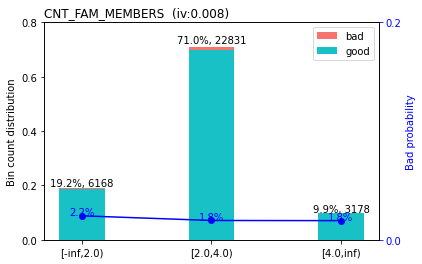

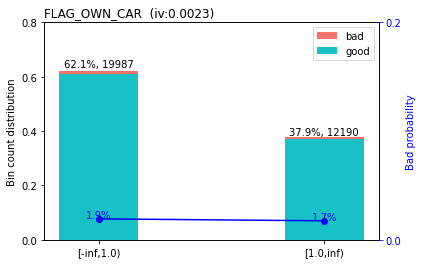

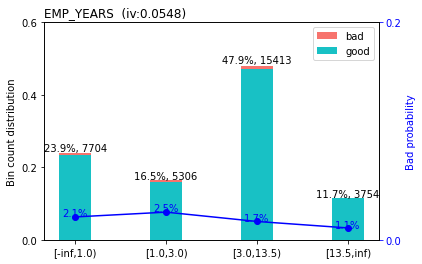

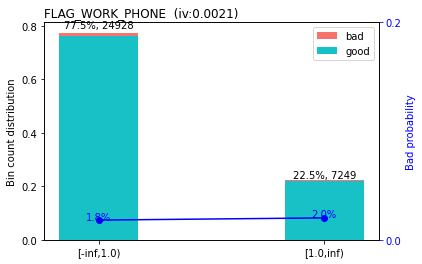

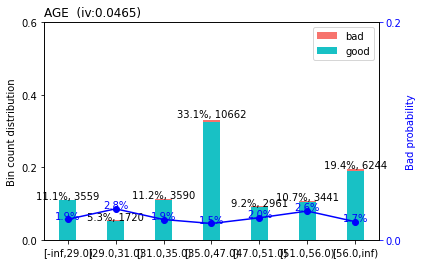

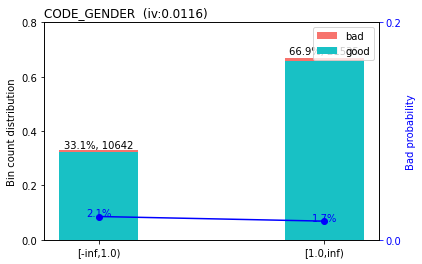

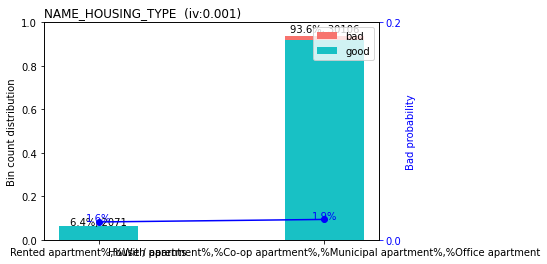

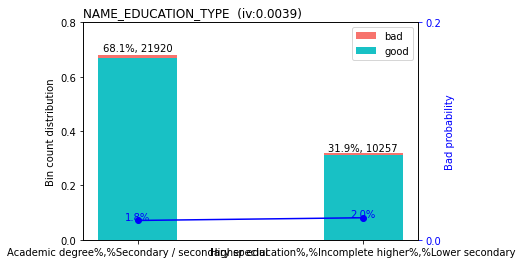

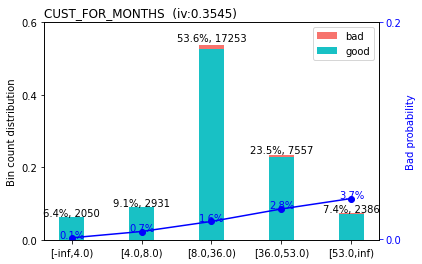

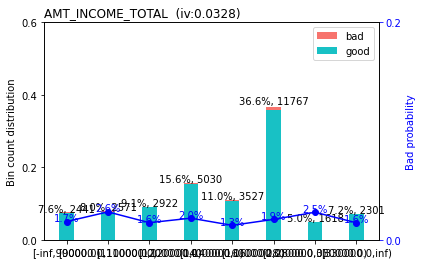

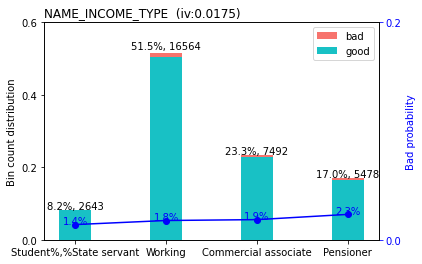

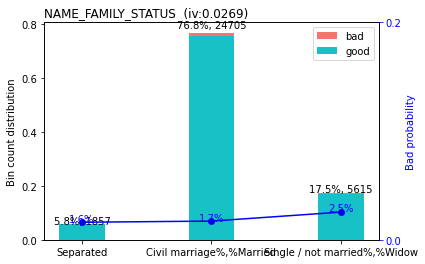

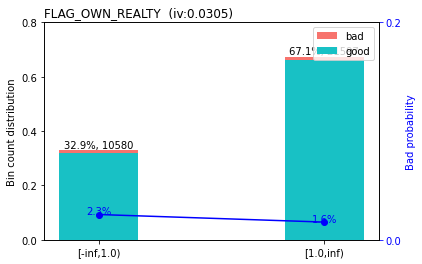

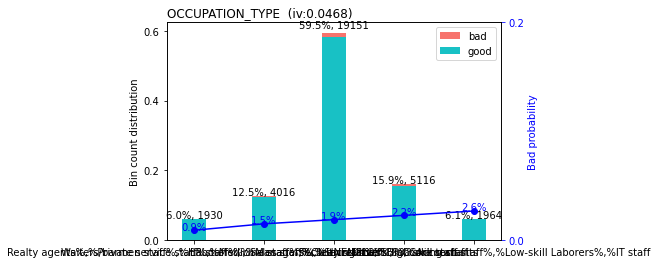

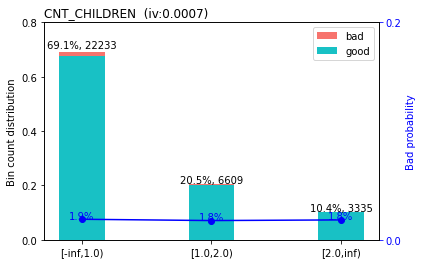

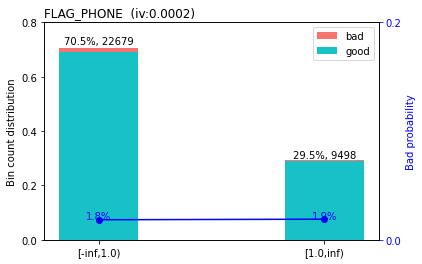

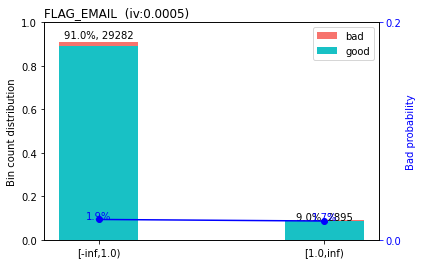

In [72]:
sc.woebin_plot(bins)
plt.show()

In [73]:
# 70% train and 30% test

train, test = sc.split_df(merged_for_credit_score, 'target', ratio=0.7).values()
print(train.shape)
print(test.shape)

(22524, 18)
(9653, 18)


In [74]:
# Prep dataset with WOE values for Log Reg training

train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


,target,CNT_FAM_MEMBERS_woe,FLAG_OWN_CAR_woe,NAME_INCOME_TYPE_woe,NAME_FAMILY_STATUS_woe,EMP_YEARS_woe,FLAG_WORK_PHONE_woe,FLAG_OWN_REALTY_woe,OCCUPATION_TYPE_woe,CODE_GENDER_woe,CNT_CHILDREN_woe,NAME_HOUSING_TYPE_woe,AGE_woe,NAME_EDUCATION_TYPE_woe,CUST_FOR_MONTHS_woe,FLAG_EMAIL_woe,FLAG_PHONE_woe,AMT_INCOME_TOTAL_woe
0,0,-0.044922,-0.062794,-0.046842,-0.078662,-0.098615,0.081991,-0.133589,-0.002625,0.145096,0.016650,-0.126216,0.004281,0.088967,-0.145219,0.007096,-0.008453,-0.175154
4,0,0.174478,0.036513,-0.001733,0.322102,-0.098615,-0.025109,-0.133589,-0.239047,-0.079944,0.016650,0.008143,0.360801,-0.044399,-0.145219,-0.074638,0.019910,0.010725
7,0,0.174478,0.036513,0.233835,-0.142576,0.126011,-0.025109,-0.133589,-0.002625,-0.079944,0.016650,0.008143,-0.111532,0.088967,-0.145219,0.007096,-0.008453,0.316949
8,0,0.174478,0.036513,0.233835,-0.142576,0.126011,-0.025109,-0.133589,-0.002625,-0.079944,0.016650,0.008143,-0.111532,0.088967,-0.145219,0.007096,-0.008453,0.316949
10,0,-0.044922,-0.062794,-0.046842,-0.078662,0.321110,0.081991,-0.133589,-0.002625,0.145096,0.016650,0.008143,-0.217490,0.088967,-1.013863,-0.074638,0.019910,0.010725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36448,1,-0.044922,-0.062794,-0.046842,-0.078662,-0.098615,0.081991,-0.133589,-0.002625,0.145096,0.016650,0.008143,0.437300,-0.044399,-0.145219,0.007096,-0.008453,0.010725
36449,1,-0.044922,-0.062794,-0.046842,-0.078662,0.321110,-0.025109,0.228794,0.194196,0.145096,-0.049495,0.008143,0.013120,0.088967,-0.145219,-0.074638,0.019910,-0.175154
36450,1,-0.044922,-0.062794,-0.046842,-0.078662,-0.098615,-0.025109,-0.133589,-0.002625,0.145096,0.016650,0.008143,0.360801,-0.044399,-0.145219,0.007096,-0.008453,0.330268
36454,1,-0.044922,0.036513,0.233835,-0.078662,-0.098615,-0.025109,-0.133589,-0.756558,-0.079944,0.016650,0.008143,0.004281,0.088967,-0.145219,-0.074638,0.019910,-0.337983


In [75]:
# create the X & y for train & test

y_train = train_woe.loc[:,'target']
X_train = train_woe.loc[:,train_woe.columns != 'target']
y_test = test_woe.loc[:,'target']
X_test = test_woe.loc[:,train_woe.columns != 'target']

# create the log reg model

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[-0.56358084  1.00645791  0.83544951  1.29858587  0.74198703 -0.04482977
   0.81477064  1.07998058  0.78332851  0.07411283  0.56657632  1.0329233
   0.43407919  1.10266409  0.11130513  0.07502029  0.83702584]]
[-3.96624628]


In [76]:
# generate scorecard

score_card = sc.scorecard(bins, lr, X_train.columns)
pprint.pprint(score_card)

{'AGE':    variable          bin  points
11      AGE  [-inf,29.0)    -1.0
12      AGE  [29.0,31.0)   -33.0
13      AGE  [31.0,35.0)    -0.0
14      AGE  [35.0,47.0)    16.0
15      AGE  [47.0,51.0)    -7.0
16      AGE  [51.0,56.0)   -27.0
17      AGE   [56.0,inf)     8.0,
 'AMT_INCOME_TOTAL':             variable                  bin  points
29  AMT_INCOME_TOTAL       [-inf,90000.0)     6.0
30  AMT_INCOME_TOTAL   [90000.0,110000.0)   -20.0
31  AMT_INCOME_TOTAL  [110000.0,120000.0)    10.0
32  AMT_INCOME_TOTAL  [120000.0,140000.0)    -4.0
33  AMT_INCOME_TOTAL  [140000.0,160000.0)    20.0
34  AMT_INCOME_TOTAL  [160000.0,280000.0)    -1.0
35  AMT_INCOME_TOTAL  [280000.0,330000.0)   -19.0
36  AMT_INCOME_TOTAL       [330000.0,inf)    11.0,
 'CNT_CHILDREN':         variable         bin  points
51  CNT_CHILDREN  [-inf,1.0)    -0.0
52  CNT_CHILDREN   [1.0,2.0)     0.0
53  CNT_CHILDREN   [2.0,inf)     0.0,
 'CNT_FAM_MEMBERS':           variable         bin  points
0  CNT_FAM_MEMBERS  [-inf,2.0)